# **Exploratory Data Analysis on Online Course Enrollment Data**


## Prepare and setup the lab environment


In [5]:
!pip install seaborn==0.11.1
!pip install wordcloud==1.8.1

  Obtaining dependency information for seaborn==0.11.1 from https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/285.0 kB ? eta -:--:--
   ---------------------------------------- 285.0/285.0 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
     ---------------------------------------- 0.0/220.7 kB ? eta -:--:--
     ------------------------------------- 220.7/220.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for wordcloud
Failed to build wordcloud


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64

Importing necessary class/methods in the packages


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [7]:
# also set a random state
rs = 123

### Loading and explore the dataset


In [8]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [9]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

Exploring the course genre dataset

In [10]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [11]:
course_df.shape

(307, 16)

Then we can take a quick look at its header rows


In [12]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [13]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [14]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, I will try to determine keywords in the titles. Those keywords in the titles may give a more intuitive summary of what kind of courses we have in the dataset.

### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [15]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [16]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [17]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Creating a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [18]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [19]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


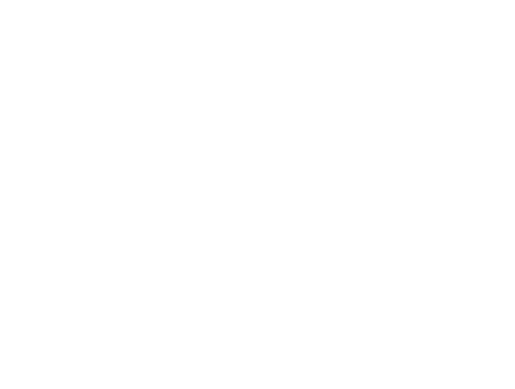

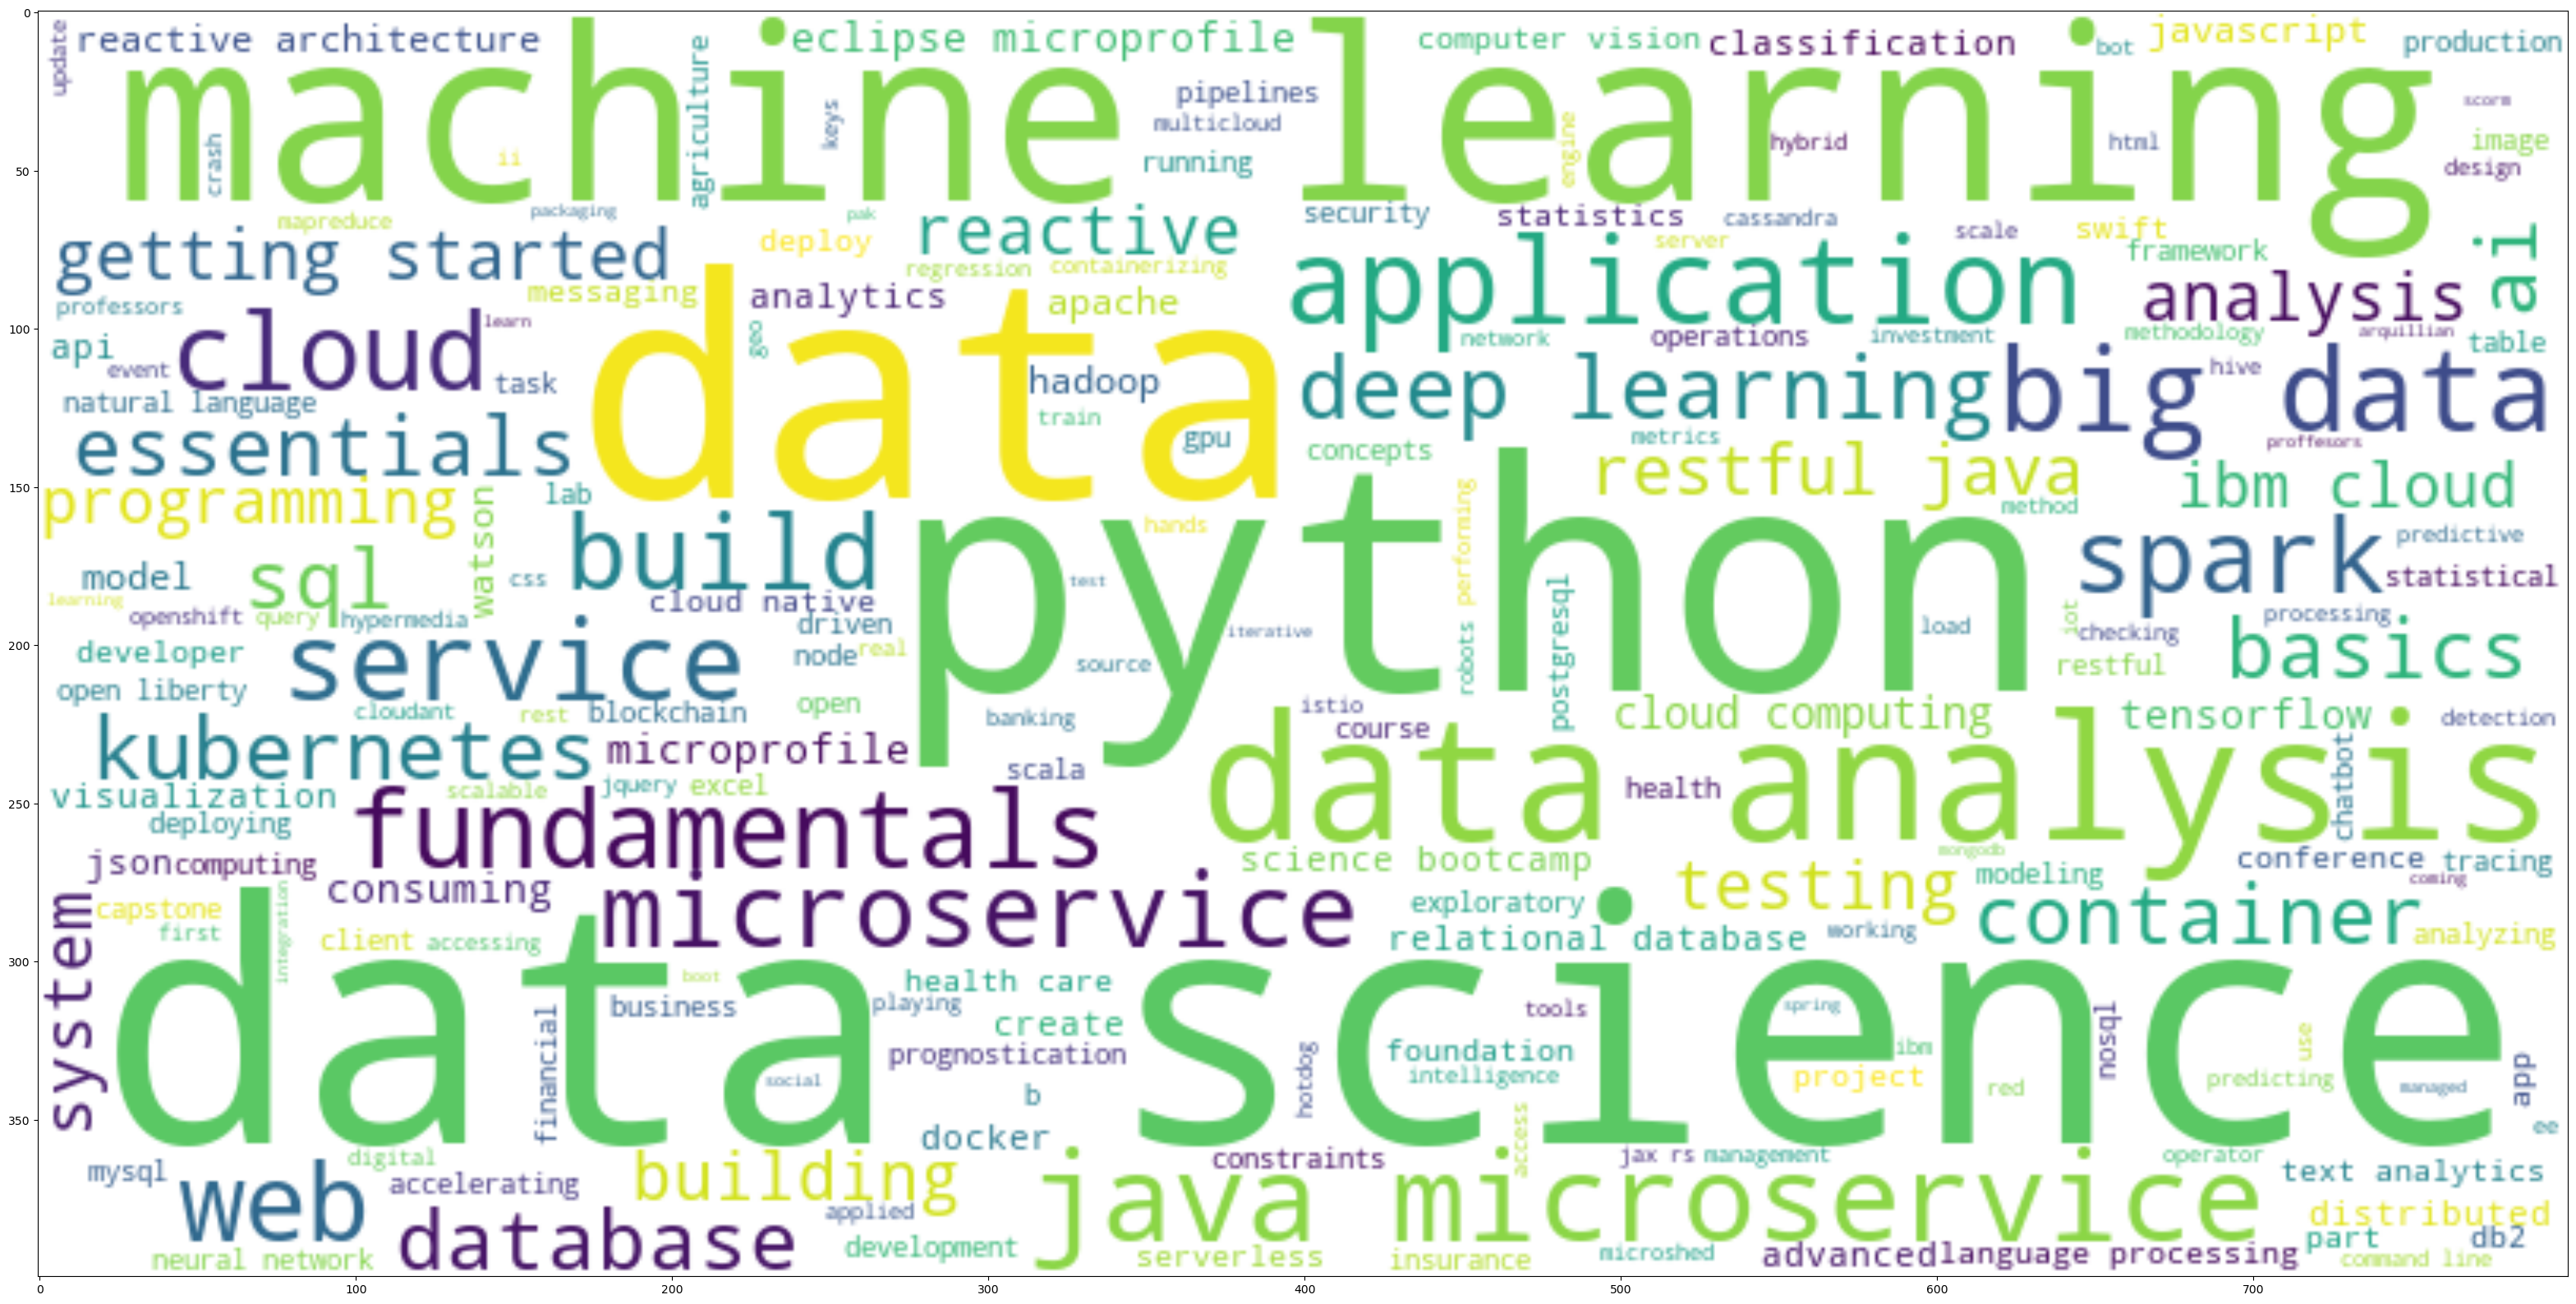

In [20]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


## Analyze Course Genres


_Find all courses with genre `MachineLearning` == 1_


In [21]:


indexes = course_df[course_df['MachineLearning']==1].index.to_list()
ml_courses = course_df['TITLE'][indexes]
ml_courses

1                    accelerating deep learning with gpu
15                                  data   ai essentials
19              ybrid cloud conference  ai pipelines lab
21                     data   ai  jumpstart your journey
24                    ai for everyone  master the basics
                             ...                        
274          convolutional neural networks in tensorflow
282                       machine learning with big data
290    natural language processing with attention models
291     natural language processing with sequence models
292    natural language processing with probabilistic...
Name: TITLE, Length: 69, dtype: object

_Find all courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [22]:


indexes2 = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)].index.to_list()
ml_bd_courses = course_df['TITLE'][indexes2]
ml_bd_courses

46     insurance risk assessment with montecarlo meth...
59                               text analytics at scale
184                                          spark mllib
282                       machine learning with big data
Name: TITLE, dtype: object

In [23]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


_I will be using the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions_


In [24]:


#group by genre

genre = course_df[genres].sum(axis=0)

genre_sorted = pd.DataFrame(genre, columns =['Count']).sort_values(by='Count', ascending=False)
genre_sorted

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


We can also vsiaulize course genre counts using a bar chart:


_Using seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre._


[Text(0, 0, 'Database'),
 Text(1, 0, 'Python'),
 Text(2, 0, 'CloudComputing'),
 Text(3, 0, 'DataAnalysis'),
 Text(4, 0, 'Containers'),
 Text(5, 0, 'MachineLearning'),
 Text(6, 0, 'ComputerVision'),
 Text(7, 0, 'DataScience'),
 Text(8, 0, 'BigData'),
 Text(9, 0, 'Chatbot'),
 Text(10, 0, 'R'),
 Text(11, 0, 'BackendDev'),
 Text(12, 0, 'FrontendDev'),
 Text(13, 0, 'Blockchain')]

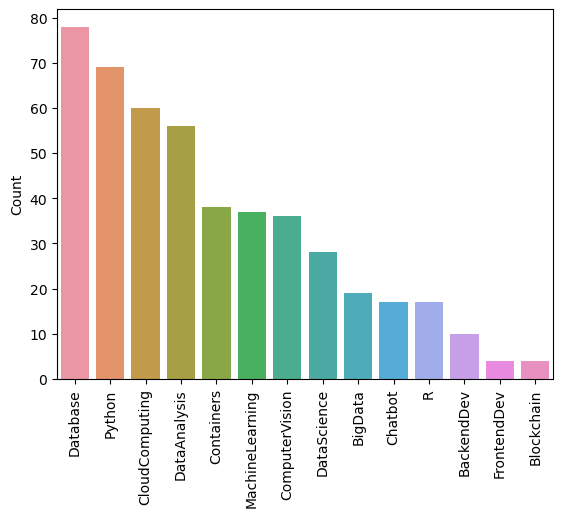

In [25]:
# WRITE YOUR CODE HERE
plot = sns.barplot(x=genre.index, y='Count', data = genre_sorted)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)


## Analyzing Course Enrollments


In [26]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.


There are learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. 

In this project, these terms may be used interchangeably.


In [27]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.


Let's see how many ratings/enrollment we have in the dataset:


In [28]:
ratings_df.shape[0]

233306

There are 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


_I will be applying Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation._


In [29]:


users = ratings_df.groupby('user').size()
print('Total number of users: ', len(users))
rating_counts = pd.DataFrame(users, columns= ['rating_count'])

Total number of users:  33901


_Using describe() to report the statistics summary of the user enrollments._


In [30]:

rating_counts.describe()

,rating_count
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


_Plotting the histogram of user rating counts._


<Axes: ylabel='Count'>

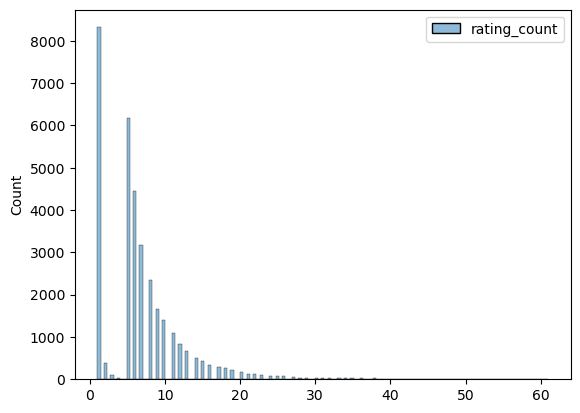

In [31]:


sns.histplot(data=rating_counts)

## Finding the Top-20 Most Popular Courses


_Using Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions_


In [32]:


items = ratings_df.groupby(['item']).size().reset_index()
top20 = items[0:20].sort_values(by =[0], ascending=False)
top20 = top20.rename(columns ={'item':'COURSE_ID' , 0 :'ratings'}).reset_index(drop=True)
top20

,COURSE_ID,ratings
0,BD0101EN,13291
1,BD0111EN,10599
2,BD0211EN,7551
3,BC0101EN,6719
4,BD0115EN,3670
5,BD0141EN,3044
6,BD0131EN,2873
7,BC0201EN,2866
8,BD0212EN,1992
9,BD0121EN,1608


Now we see the item IDs which do not indicate what kind of courses they are. 

_Using Pandas merge() method to join the course_df (contains the course title column)._


In [33]:
#join course_df with top20 df to identify most popular courses by title not ID
#in course df we have course ID and course Title 
#top20 we have course ID and ratings 

df1= course_df.copy()
df2= top20.copy()

popular = df1[['COURSE_ID' , 'TITLE']].merge(df2, how='inner').drop(['COURSE_ID'], axis=1).sort_values(by='ratings', ascending=False)
popular

,TITLE,ratings
17,big data 101,13291
18,hadoop 101,10599
14,spark fundamentals i,7551
6,blockchain essentials,6719
13,mapreduce and yarn,3670
3,accessing hadoop data using hive,3044
12,moving data into hadoop,2873
7,ibm blockchain foundation developer,2866
1,spark fundamentals ii,1992
9,apache pig 101,1608


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [34]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

_Getting the percentage of the top-20 course enrollments._


In [35]:

part = popular['ratings'].sum()

In [36]:
print(f"Percentage of the top course enrollments:" , round(part/total*100,2), "%")

Percentage of the top course enrollments: 26.3 %
